# Table of Contents 
[Libraries Used](#libraries) 

Part I: [Read Data and EDA](#prelim)

Part II: [Feature selection and importance](#featureselection)

Part III: [Model selection and data training](#modelselection)

Part IV: [Hyperparameter optimization of best model](#hyperparameter)

Part V: [Employing XGBoost Regression - Best model](#bestmodelp)

Part VI: [Predictions with designed ML model - Out of sample 1](#makeprediction1)

Part VI: [Predictions with designed ML model - Out of sample 2](#makeprediction2)

<a id='prelim'></a>

In [1]:
#Import Libraries

#General libs
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import sort

# SKlearn libraries for learning.
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split
from sklearn import linear_model 
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgbm

# SKlearn libraries for evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectFromModel

%matplotlib inline

# Control the hyperparameter optimization for the best model. It can be expensive
hyperparam_opt=False

#Set to true to download figures
savefigs=False

#<a id='prelim'></a>

## Part I: Read Data and EDA

## Loading data - 0K

In [2]:
one = pd.read_csv('2D-data/0K-data/1T-Mechanicalppts_SnX2.txt', index_col = 0, delimiter = ',')
one1 = pd.read_csv('2D-data/0K-data/Mechanicalppts_1T-0K.txt', index_col = 0, delimiter = ',')
oneT_0K = pd.concat([one, one1])

twoH_0K = pd.read_csv('2D-data/0K-data/Mechanicalppts_2H-0K.txt', index_col = 0, delimiter = ',')

TMT1_0K = pd.read_csv('2D-data/0K-data/TMT-Ge_Mechanicalppts.txt', index_col = 0, delimiter = ',')
TMT2_0K = pd.read_csv('2D-data/0K-data/TMT-Si_Mechanicalppts.txt', index_col = 0, delimiter = ',')
TMT_0K = pd.concat([TMT1_0K, TMT2_0K])

PbX_0K = pd.read_csv('2D-data/0K-data/PbX_Mechanicalppts_0K.txt', index_col = 0, delimiter = ',')
ZnO_0K = pd.read_csv('2D-data/0K-data/ZnO_Like_Mechanicalppts_0K.txt', index_col = 0, delimiter = ',')
GeX_0K = pd.read_csv('2D-data/0K-data/Mechanicalppts_GeX-0K.txt', index_col = 0, delimiter = ',')
BX_0K = pd.read_csv('2D-data/0K-data/Mechanicalppts_BX-0K.txt', index_col = 0, delimiter =',')
Graphene_0K = pd.read_csv('2D-data/0K-data/Graphene_Co_Mechanicalppt.txt', index_col = 0, delimiter = ',')

##Removing the columns of quantities derivable from C11 and C12 and adding a column of temperature.
sets = [oneT_0K, twoH_0K, PbX_0K, ZnO_0K, BX_0K, Graphene_0K, GeX_0K]  
for set in sets:
    set.drop(labels=['Y_2D_a', 'Y_2D_b', 'G_a', 'G_b', 'B_a', 'B_b', 'V_a', 'V_b'], axis = 'columns', inplace = True)
    set.rename(columns={"aa" : "a", "bb" : "b", "cc" : "c"}, inplace = True)
    set['Temp'] = '0K'
    display(set)

TMT_0K = TMT_0K[['a', 'b', 'c', 'SG', 'C11', 'C12']]
TMT_0K['Temp'] = '0K'
TMT_0K['a'] = TMT_0K['a']/2        ##Unit cell dimension
TMT_0K['b'] = TMT_0K['b']/2
display(TMT_0K)




,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Ge-O-2,2.936,2.936,24.471,164.0,158.50,40.89,0K
Ge-S-2,3.417,3.417,18.059,164.0,94.85,22.89,0K
Ge-Se-2,3.593,3.593,16.341,164.0,66.34,30.96,0K
Ge-Te-2,3.830,3.830,14.376,164.0,27.66,29.96,0K
Pb-O-2,3.397,3.397,18.272,164.0,94.19,30.36,0K
Pb-S-2,3.808,3.808,14.548,164.0,55.27,15.39,0K
Pb-Se-2,3.945,3.945,13.553,164.0,40.69,17.77,0K
Pb-Te-2,3.881,3.881,14.004,164.0,1.56,20.12,0K
Si-O-2,2.783,2.783,27.223,164.0,173.07,38.93,0K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Cr-O-2,2.754,2.754,20.404,187.0,143.70,36.59,0K
Cr-S-2,3.010,3.010,17.088,187.0,129.49,30.75,0K
Cr-Se-2,3.178,3.178,15.320,187.0,105.68,28.11,0K
Cr-Te-2,3.486,3.486,12.734,187.0,76.41,25.93,0K
Hf-O-2,3.104,3.104,16.061,187.0,171.32,78.65,0K
Hf-S-2,3.512,3.512,12.548,187.0,95.56,33.29,0K
Hf-Se-2,3.643,3.643,11.661,187.0,80.60,27.73,0K
Hf-Te-2,3.850,3.850,10.440,187.0,47.52,19.57,0K
Mo-O-2,2.840,2.840,19.185,187.0,227.21,79.22,0K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Pb-S,4.073,4.073,28.299,123.0,44.19,26.03,0K
Pb-Se,4.220,4.220,26.358,123.0,41.31,26.20,0K
Pb-Te,4.472,4.472,23.471,123.0,34.09,23.90,0K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Ba-O-2,4.255,4.255,15.555,187.0,45.58,41.09,0K
Ba-S-2,5.112,5.112,10.773,187.0,25.30,22.52,0K
Ba-Se-2,5.329,5.329,9.916,187.0,21.93,19.78,0K
Ba-Te-2,5.690,5.690,8.697,187.0,18.15,17.08,0K
Be-O-2,2.765,2.765,36.828,187.0,116.62,31.37,0K
Be-S-2,3.444,3.444,23.738,187.0,79.13,32.55,0K
Be-Se-2,3.655,3.655,21.076,187.0,68.30,27.91,0K
Be-Te-2,4.012,4.012,17.491,187.0,55.39,22.80,0K
Cd-O-2,3.671,3.671,20.900,187.0,62.90,53.12,0K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Al-As,4.079,4.079,15.835,187.0,64.18,31.10,0K
Al-N,3.122,3.122,27.024,187.0,142.50,68.50,0K
Al-P,3.925,3.925,17.097,187.0,74.36,37.44,0K
B-As,3.382,3.382,23.028,187.0,127.47,37.32,0K
B-N,2.587,2.587,39.359,187.0,235.80,35.03,0K
B-P,3.206,3.206,25.625,187.0,147.05,40.61,0K
Ga-As,4.094,4.094,15.718,187.0,58.72,24.36,0K
Ga-N,3.250,3.250,24.947,187.0,137.06,69.70,0K
Ga-P,3.933,3.933,17.034,187.0,74.54,32.90,0K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Borophene,3.250,4.506,15.827,11.0,333.57,14.11,0K
Ge,4.039,4.039,10.967,164.0,46.81,15.24,0K
Graphene,2.467,2.467,19.980,191.0,364.90,67.97,0K
hBN,2.511,2.511,20.004,187.0,290.55,66.86,0K
Si,3.847,3.847,12.086,164.0,68.22,21.15,0K
Sn,4.624,4.624,8.366,164.0,27.31,11.58,0K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Ge-S,3.731,4.223,13.197,31.0,53.58,33.36,0K
Ge-Se,3.968,4.242,12.351,31.0,56.62,33.10,0K
Ge-Te,4.234,4.348,11.292,31.0,43.81,27.56,0K
Si-S,3.351,4.569,13.576,31.0,74.26,22.39,0K
Si-Se,3.750,4.291,12.919,31.0,59.04,41.13,0K
Si-Te,4.099,4.319,11.743,31.0,51.86,37.88,0K
Sn-S,4.073,4.151,12.294,31.0,19.18,12.46,0K
Sn-Se,4.281,4.282,11.339,31.0,19.61,10.87,0K
Sn-Te,4.573,4.725,9.622,31.0,34.58,21.26,0K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Co-Ge-Se,3.0820,3.0820,38.813,147.0,240.88,63.98,0K
Co-Ge-S,2.9135,2.9135,43.435,147.0,310.41,90.06,0K
Co-Ge-Te,3.3510,3.3510,32.832,147.0,160.88,38.78,0K
Cr-Ge-Se,3.1000,3.1000,38.366,147.0,138.12,140.34,0K
Cr-Ge-S,2.9915,2.9915,41.204,147.0,74.24,93.26,0K
Cr-Ge-Te,3.3590,3.3590,32.681,147.0,109.69,71.38,0K
Cu-Ge-Se,3.1185,3.1185,37.912,147.0,118.27,46.25,0K
Cu-Ge-S,2.9635,2.9635,41.986,147.0,136.88,97.25,0K
Cu-Ge-Te,3.3880,3.3880,32.122,147.0,74.17,11.13,0K


## Loading data - 300K

In [3]:
oneT_300K = pd.read_csv('2D-data/300K-data/1T-Mechanicalppts.txt', index_col = 0, delimiter = ',')

twoH_300K = pd.read_csv('2D-data/300K-data/2H-Mechanicalppts.txt', index_col = 0, delimiter =',')

TMT1_300K = pd.read_csv('2D-data/300K-data/TMT-Ge_Mechanicalppts.txt', index_col = 0, delimiter =',')
TMT2_300K = pd.read_csv('2D-data/300K-data/TMT-Si_Mechanicalppts.txt', index_col = 0, delimiter = ',')
TMT_300K = pd.concat([TMT1_300K, TMT2_300K])

PbX_300K = pd.read_csv('2D-data/300K-data/PbX_Mechanicalppts.txt', index_col = 0, delimiter =',')
ZnX_300K = pd.read_csv('2D-data/300K-data/ZnX-Mechanicalppts.txt', index_col = 0, delimiter =',')
GeX_300K = pd.read_csv('2D-data/300K-data/GeX_Mechanicalppts.txt', index_col = 0, delimiter = ',')
BX_300K = pd.read_csv('2D-data/300K-data/BX_Mechanicalppts.txt', index_col = 0, delimiter =',')
Graphene_300K = pd.read_csv('2D-data/300K-data/Graphene-like_Mechanicalppts.txt', index_col = 0, delimiter = ',')

#Fixing the space group no. assuming that it doesn't change with temperature. 
#1T - 164
#2H - 187
# PbX - 123
# ZnX - 187
# BX - 184
# GeX - 31

oneT_300K['SG'].replace(1.0, 164, True)
twoH_300K['SG'].replace(1.0, 187, True)
PbX_300K['SG'].replace(1.0, 147, True)        ## should be 123
ZnX_300K['SG'].replace(1.0, 187, True)
BX_300K['SG'].replace(1.0, 187, True)
GeX_300K['SG'].replace(1.0, 31, True)
TMT_300K['SG'].replace(1.0, 147, True)
mat = Graphene_0K.index
for mat in mat:
    Graphene_300K.loc[mat, 'SG'] = Graphene_0K.at[mat, 'SG']
    

##Removing the columns of quantities derivable from C11 and C12 and adding a column of temperature.
sets300 = [oneT_300K, twoH_300K, TMT_300K, PbX_300K, ZnX_300K, GeX_300K, BX_300K, Graphene_300K]

for set in sets300:
    set.drop(labels=['Y_2D_a', 'Y_2D_b', 'G_a', 'G_b', 'B_a', 'B_b', 'V_a', 'V_b'], axis = 'columns', inplace = True)
    if set is not TMT_300K:
        set['a'] = set['a']/3                  ##Unit cell dimension
        set['b'] = set['b']/3
    else: 
        set['a'] = set['a']/2  
        set['b'] = set['b']/2    
    #set = set[['a', 'b', 'c', 'SG', 'C11', 'C12', 'Phase']]
    set['Temp'] = '300K'
    display(set)

    


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Cr-O-2,2.866667,2.866667,25.662,164.0,-97.12,-126.14,300K
Cr-S-2,3.014333,3.014333,23.214,164.0,199.81,71.65,300K
Cr-Se-2,3.442000,3.442000,17.804,164.0,-81.94,-112.61,300K
Cr-Te-2,3.417000,3.417000,18.066,164.0,96.88,27.80,300K
Hf-O-2,3.235000,3.235000,20.155,164.0,165.01,37.35,300K
Hf-S-2,3.612000,3.612000,16.166,164.0,82.01,16.31,300K
Hf-Se-2,3.728667,3.728667,15.171,164.0,70.67,16.18,300K
Hf-Te-2,3.896000,3.896000,13.896,164.0,47.51,12.53,300K
Mo-O-2,2.927333,2.927333,24.610,164.0,153.43,47.01,300K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Cr-O-2,2.754667,2.754667,20.397,187.0,146.68,44.94,300K
Cr-S-2,3.009333,3.009333,17.090,187.0,126.62,31.35,300K
Cr-Se-2,3.174667,3.174667,15.356,187.0,102.56,29.38,300K
Cr-Te-2,3.487000,3.487000,12.730,187.0,167.05,111.57,300K
Hf-O-2,3.103667,3.103667,16.066,187.0,151.61,38.10,300K
Hf-S-2,3.507667,3.507667,12.580,187.0,90.19,33.08,300K
Hf-Se-2,3.637667,3.637667,11.697,187.0,78.47,31.17,300K
Hf-Te-2,3.852000,3.852000,10.431,187.0,45.45,24.68,300K
Mo-O-2,2.839667,2.839667,19.191,187.0,223.60,78.64,300K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Co-Ge-Se,3.0810,3.0810,38.845,147.0,206.42,56.44,300K
Co-Ge-S,2.9160,2.9160,43.367,147.0,244.97,45.42,300K
Co-Ge-Te,3.3440,3.3440,32.972,147.0,87.18,16.34,300K
Cr-Ge-Se,3.0995,3.0995,38.387,147.0,131.17,127.01,300K
Cr-Ge-S,3.0055,3.0055,40.818,147.0,99.86,98.32,300K
Cr-Ge-Te,3.3570,3.3570,32.716,147.0,59.68,39.73,300K
Cu-Ge-Se,3.1195,3.1195,37.890,147.0,48.03,-21.29,300K
Cu-Ge-S,2.9625,2.9625,42.016,147.0,37.86,11.96,300K
Cu-Ge-Te,3.3900,3.3900,32.082,147.0,41.27,-40.59,300K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Pb-Se-2,4.221667,4.221667,26.337,147.0,7.86,-3.75,300K
Pb-Te-2,4.474333,4.474333,23.447,147.0,-2.31,-4.42,300K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Ba-O-2,4.254333,4.254333,15.557,187.0,13.16,1.34,300K
Ba-S-2,5.128000,5.128000,10.708,187.0,12.03,8.64,300K
Ba-Se-2,5.329667,5.329667,9.913,187.0,-1.24,-2.97,300K
Ba-Te-2,5.681000,5.681000,8.725,187.0,6.47,4.07,300K
Be-O-2,2.764667,2.764667,36.836,187.0,110.56,26.40,300K
Be-S-2,3.441333,3.441333,23.774,187.0,50.97,3.52,300K
Be-Se-2,3.655333,3.655333,21.074,187.0,35.84,-2.81,300K
Be-Te-2,4.013333,4.013333,17.482,187.0,26.78,0.41,300K
Cd-O-2,3.671333,3.671333,20.891,187.0,40.73,26.73,300K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Ge-Se,3.975333,4.228000,12.370,31.0,77.00,40.67,300K
Ge-S,3.714333,4.247000,13.180,31.0,67.70,43.02,300K
Ge-Te,4.232333,4.363333,11.258,31.0,61.01,38.27,300K
Si-Se,3.752667,4.285000,12.929,31.0,77.24,51.92,300K
Si-S,3.348000,4.583333,13.549,31.0,91.54,29.93,300K
Si-Te,4.104333,4.309000,11.756,31.0,81.39,52.37,300K
Sn-S,4.062000,4.170333,12.273,31.0,54.47,25.67,300K
Sn-Te,4.581333,4.721667,9.611,31.0,25.25,3.86,300K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Al-As-2,4.078333,4.078333,15.838,187.0,26.94,-1.55,300K
Al-N-2,3.120667,3.120667,27.051,187.0,117.54,49.73,300K
Al-P-2,3.925333,3.925333,17.097,187.0,33.37,0.93,300K
B-As-2,3.382333,3.382333,23.028,187.0,100.74,20.48,300K
B-N-2,2.587000,2.587000,39.364,187.0,233.63,32.27,300K
B-P-2,3.204667,3.204667,25.654,187.0,136.54,37.65,300K
Ga-As-2,4.094000,4.094000,15.718,187.0,27.14,-2.95,300K
Ga-N-2,3.250000,3.250000,24.943,187.0,114.10,49.23,300K
Ga-P-2,3.931667,3.931667,17.042,187.0,29.99,-3.06,300K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Borophene,3.249333,4.505667,15.833,11.0,377.88,41.29,300K
Ge,4.037667,4.037667,10.973,164.0,30.56,5.43,300K
Graphene,2.467333,2.467333,19.978,191.0,314.92,115.73,300K
hBN,2.509667,2.509667,20.021,187.0,281.40,59.11,300K
Si,3.848333,3.848333,12.079,164.0,59.05,15.78,300K
Sn,4.621000,4.621000,8.378,164.0,16.54,4.51,300K


## Loading data - 600K 

In [4]:
oneT_600K = pd.read_csv('2D-data/600K-data/1T-Mechanicalppts.txt', index_col = 0, delimiter = ',')

twoH_600K = pd.read_csv('2D-data/600K-data/2H-Mechanicalppts.txt', index_col = 0, delimiter = ',')

GeX_600K = pd.read_csv('2D-data/600K-data/GeX-Mechanicalppts.txt', index_col = 0, delimiter = ',')

Graphene_600K = pd.read_csv('2D-data/600K-data/Graphere-like-Mechanicalppts.txt', index_col = 0, delimiter =',')

ZnX_600K = pd.read_csv('2D-data/600K-data/ZnX-Mechanicalppts.txt', index_col = 0, delimiter = ',')

sets600 = [oneT_600K, twoH_600K, ZnX_600K, GeX_600K, Graphene_600K]

#Fixing the space group no. assuming that it doesn't change with temperature. 
#1T - 164
#2H - 187
# ZnX - 187
# GeX - 31

oneT_600K['SG'].replace(1.0, 164, True)
twoH_600K['SG'].replace(1.0, 187, True)
ZnX_600K['SG'].replace(1.0, 187, True)
GeX_600K['SG'].replace(1.0, 31, True)

mats = ['Ge', 'Graphene', 'hBN', 'Si', 'Sn']
for mat in mats:
    Graphene_600K.loc[mat, 'SG'] = Graphene_0K.at[mat, 'SG']

##Removing the columns of quantities derivable from C11 and C12 and adding a column of temperature.

for set in sets600:
    set.drop(labels=['Y_2D_a', 'Y_2D_b', 'G_a', 'G_b', 'B_a', 'B_b', 'V_a', 'V_b'], axis = 'columns', inplace = True)
    set.rename(columns={"aa" : "a", "bb" : "b", "cc" : "c"}, inplace = True)
    set['a'] = set['a']/3              ##Unit cell dimension
    set['b'] = set['b']/3
    set['Temp'] = '600K'
    display(set)

,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Cr-O-2,2.866667,2.866667,25.662,164.0,-80.68,-140.78,600K
Cr-S-2,3.014333,3.014333,23.214,164.0,197.28,93.84,600K
Cr-Se-2,3.442000,3.442000,17.804,164.0,-82.08,-134.47,600K
Cr-Te-2,3.417000,3.417000,18.066,164.0,110.60,71.97,600K
Hf-S-2,3.612000,3.612000,16.166,164.0,79.97,16.88,600K
Hf-Se-2,3.728667,3.728667,15.171,164.0,69.20,16.65,600K
Hf-Te-2,3.896000,3.896000,13.896,164.0,47.64,12.02,600K
Mo-O-2,2.927333,2.927333,24.610,164.0,206.17,92.35,600K
Mo-S-2,3.131667,3.131667,21.504,164.0,113.66,11.77,600K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Cr-O-2,2.754667,2.754667,20.397,187.0,-207.32,-327.31,600K
Cr-S-2,3.009333,3.009333,17.090,187.0,149.29,49.17,600K
Cr-Se-2,3.174667,3.174667,15.356,187.0,118.85,38.42,600K
Cr-Te-2,3.487000,3.487000,12.730,187.0,183.93,124.82,600K
Hf-O-2,3.103667,3.103667,16.066,187.0,-87.42,-104.61,600K
Hf-S-2,3.507667,3.507667,12.580,187.0,88.14,32.55,600K
Hf-Se-2,3.637667,3.637667,11.697,187.0,74.92,30.70,600K
Hf-Te-2,3.852000,3.852000,10.431,187.0,46.28,22.67,600K
Mo-O-2,2.839667,2.839667,19.191,187.0,220.15,74.26,600K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Ba-O,4.254333,4.254333,15.557,187.0,14.73,5.17,600K
Ba-S,5.111000,5.111000,10.779,187.0,-0.69,-6.72,600K
Ba-Se,5.324000,5.324000,9.933,187.0,-5.14,-11.14,600K
Ba-Te,5.681000,5.681000,8.725,187.0,-9.18,-10.45,600K
Be-O,2.764667,2.764667,36.836,187.0,107.03,22.49,600K
Be-S,3.441333,3.441333,23.774,187.0,48.41,4.52,600K
Be-Se,3.655333,3.655333,21.074,187.0,41.30,4.22,600K
Be-Te,4.013333,4.013333,17.482,187.0,28.63,-0.35,600K
Cd-O,3.671333,3.671333,20.891,187.0,40.50,25.20,600K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Ge-S,2.476333,2.831333,13.180,31.0,45.77,31.40,600K
Ge-Se,2.650333,2.818667,12.370,31.0,58.15,29.01,600K
Ge-Te,2.821667,2.909000,11.258,31.0,44.04,25.83,600K
Si-S,2.232000,3.055667,13.549,31.0,65.04,19.14,600K
Si-Se,2.501667,2.856667,12.929,31.0,53.78,17.29,600K
Si-Te,2.736000,2.872667,11.756,31.0,61.91,32.64,600K
Sn-S,2.708000,2.780333,12.273,31.0,27.35,10.00,600K
Sn-Se,2.850000,3.010667,10.768,31.0,34.83,21.53,600K
Sn-Te,3.054000,3.147667,9.611,31.0,28.48,16.95,600K


,a,b,c,SG,C11,C12,Temp
Material,,,,,,,
Ge,4.037667,4.037667,10.973,164.0,25.61,5.08,600K
Graphene,2.467333,2.467333,19.977,191.0,314.64,97.09,600K
hBN,2.509667,2.509667,20.021,187.0,293.89,63.38,600K
Pb,4.822667,4.822667,7.692,1.0,2.62,2.29,600K
Si,3.848000,3.848000,12.081,164.0,53.88,14.32,600K
Sn,4.621333,4.621333,8.377,164.0,-0.47,-7.47,600K


In [5]:
dataset = pd.concat([oneT_0K, oneT_300K, oneT_600K, twoH_0K, twoH_300K, twoH_600K, TMT_0K, TMT_300K, PbX_0K, PbX_300K, ZnO_0K, ZnX_300K, ZnX_600K, GeX_0K, GeX_300K, GeX_600K, BX_0K, BX_300K, Graphene_0K, Graphene_300K, Graphene_600K])
#dataset = dataset.astype({'SG': str})
#dataset = dataset[(dataset['C11']> 0) & (dataset['C11']>dataset['C12']) & (dataset['a']==dataset['b']) ]
#dataset.drop(labels=['C11','C12', 'Y_2D_b', 'G_a', 'G_b', 'B_a', 'B_b', 'V_a', 'V_b'], axis = 'columns', inplace = True)
dataset.dtypes

a       float64
b       float64
c       float64
SG      float64
C11     float64
C12     float64
Temp     object
dtype: object

In [6]:
dataset.describe()

,a,b,c,SG,C11,C12
count,408.000000,408.000000,408.000000,408.000000,406.000000,406.000000
mean,3.518538,3.545480,21.042203,161.088235,93.570739,32.208695
std,0.613918,0.623000,9.846342,40.213033,77.312089,48.139175
min,2.232000,2.467000,7.692000,1.000000,-207.320000,-327.310000
25%,3.095625,3.099875,13.844500,147.000000,41.302500,12.817500
50%,3.369083,3.382167,17.478500,164.000000,78.100000,26.770000
75%,3.852000,3.884750,25.736500,187.000000,127.447500,45.622500
max,5.690000,5.690000,45.206000,191.000000,377.880000,306.160000


In [7]:
dataset = dataset[(dataset['C11']> 0) & (dataset['C11']>dataset['C12']) & (dataset['a']==dataset['b']) ]
dataset.drop(['b'], axis = 'columns', inplace = True)

dataset.drop(['Pb'], axis = 0, inplace = True)   ##!

dataset

,a,c,SG,C11,C12,Temp
Material,,,,,,
Ge-O-2,2.936000,24.471,164.0,158.50,40.89,0K
Ge-S-2,3.417000,18.059,164.0,94.85,22.89,0K
Ge-Se-2,3.593000,16.341,164.0,66.34,30.96,0K
Pb-O-2,3.397000,18.272,164.0,94.19,30.36,0K
Pb-S-2,3.808000,14.548,164.0,55.27,15.39,0K
...,...,...,...,...,...,...
Sn,4.621000,8.378,164.0,16.54,4.51,300K
Ge,4.037667,10.973,164.0,25.61,5.08,600K
Graphene,2.467333,19.977,191.0,314.64,97.09,600K


In [8]:
dataset['SG'].value_counts()

187.0    166
164.0     99
147.0     76
191.0      3
123.0      3
Name: SG, dtype: int64

#### Including rarely occuring SG values

Magority of the SG values are 187, 164, 147. 
Any SG value occuring less than 4 times is assigned 0. 

In [9]:
SG_in_model = dataset.SG.value_counts().reset_index(name="count").query("count > 4")["index"]


def replace_rare_SG_occurances(dataset):
    dataset.loc[~dataset["SG"].isin(SG_in_model), "SG"] = 0
    return dataset
    
replace_rare_SG_occurances(dataset)


,a,c,SG,C11,C12,Temp
Material,,,,,,
Ge-O-2,2.936000,24.471,164.0,158.50,40.89,0K
Ge-S-2,3.417000,18.059,164.0,94.85,22.89,0K
Ge-Se-2,3.593000,16.341,164.0,66.34,30.96,0K
Pb-O-2,3.397000,18.272,164.0,94.19,30.36,0K
Pb-S-2,3.808000,14.548,164.0,55.27,15.39,0K
...,...,...,...,...,...,...
Sn,4.621000,8.378,164.0,16.54,4.51,300K
Ge,4.037667,10.973,164.0,25.61,5.08,600K
Graphene,2.467333,19.977,0.0,314.64,97.09,600K


In [10]:
dataset['SG'].value_counts()

187.0    166
164.0     99
147.0     76
0.0        6
Name: SG, dtype: int64

## Encoding of categorical variables

In [11]:
encSG = LabelEncoder()
encT = LabelEncoder()
enc = [encSG, encT]
categorical_variables = ['SG','Temp']
for c, encoder in zip(categorical_variables, enc):
    print(f"Label Encoding: {c} - {dataset[c].nunique()}")
    encoder.fit(dataset[c])
    dataset[c] = encoder.transform(dataset[c])

Label Encoding: SG - 4
Label Encoding: Temp - 3


In [12]:
FinalSet = dataset.copy()
FinalSet

,a,c,SG,C11,C12,Temp
Material,,,,,,
Ge-O-2,2.936000,24.471,2,158.50,40.89,0
Ge-S-2,3.417000,18.059,2,94.85,22.89,0
Ge-Se-2,3.593000,16.341,2,66.34,30.96,0
Pb-O-2,3.397000,18.272,2,94.19,30.36,0
Pb-S-2,3.808000,14.548,2,55.27,15.39,0
...,...,...,...,...,...,...
Sn,4.621000,8.378,2,16.54,4.51,1
Ge,4.037667,10.973,2,25.61,5.08,2
Graphene,2.467333,19.977,0,314.64,97.09,2


<a id='featureselection'></a>

## Part II: Feature selection and feature importance

A simple correlation map is used to assess the correlation of different features with the target (a). In a typical ML problen we drop features based on this map to reduce the computation cost. We could have dropped some of these features on the basis of their weak correlation with 'a', but since this problem does not have too large a feature set we go ahead with all of them.

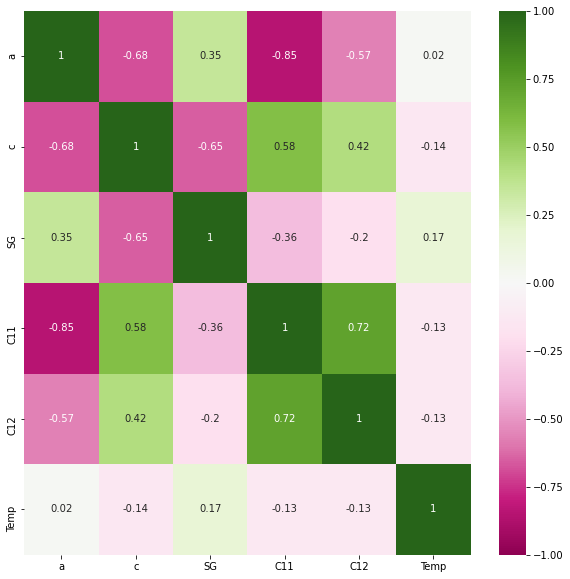

In [13]:
f, ax = plt.subplots(figsize=(10, 10))
grid = sns.heatmap(FinalSet.corr(method = 'spearman').round(2), annot = True, cmap="PiYG", vmin=-1, vmax=1, ax=ax);

if savefigs==True:
    f.savefig("Figures/CorrMap_2D", dpi = 1200, transparent = False, facecolor = 'white')

<AxesSubplot:>

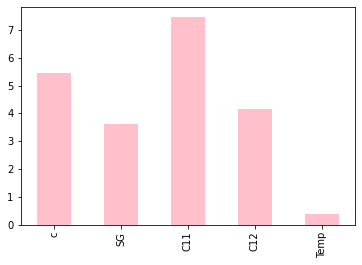

In [14]:
fea = [c for c in FinalSet.columns if c!= "a"]
Ximp = FinalSet[fea]
Yimp = FinalSet["a"]
sel = SelectKBest(f_regression, k="all")
sel.fit_transform(Ximp, Yimp)
importance = sel.scores_
impGraph = pd.Series(np.cbrt(importance), Ximp.columns)
impGraph.plot.bar(color = "Pink")

For regression, C11 has the maximum importance followed the vacuum size 'c' of the system. It seems that temperature is not important for regression. This is also seen in the datasets where the lattice constant column has almost identical values for all three temepratures. 

<a id='modelselection'></a>

## Part III: Model selection and data training

### Remove 20% of the dataset as unseen data for out-of-sample validation

In [15]:
data, data_test = train_test_split(FinalSet, test_size = 0.2, random_state = 42)
data = pd.DataFrame(data)
predict_data_1 = pd.DataFrame(data_test)
display(data)
display(predict_data_1)

,a,c,SG,C11,C12,Temp
Material,,,,,,
Fe-Ge-Te,3.388000,32.125,1,151.29,46.60,0
Re-Te-2,3.349667,18.799,2,44.37,27.74,2
Zr-Te-2,3.904000,13.837,2,38.21,9.87,2
Cr-Se-2,3.439000,17.833,2,45.79,4.23,0
Cr-S-2,3.014333,23.214,2,197.28,93.84,2
...,...,...,...,...,...,...
Cr-Si-Se,3.027000,40.239,1,206.90,186.46,0
Mo-O-2,2.927333,24.610,2,206.17,92.35,2
Ti-Se-2,3.450000,13.004,3,69.06,25.84,0


,a,c,SG,C11,C12,Temp
Material,,,,,,
Al-N-2,3.120667,27.051,3,117.54,49.73,1
Zr-Se-2,3.664000,11.529,3,73.87,26.81,0
B-N-2,2.587000,39.364,3,233.63,32.27,1
Zn-S-2,3.871000,18.794,3,61.26,32.77,0
Zn-Se,4.084000,16.882,3,22.50,-0.90,2
...,...,...,...,...,...,...
Cr-Se-2,3.178000,15.320,3,105.68,28.11,0
Ni-Ge-Se,3.113000,38.054,1,187.37,65.79,0
V-Ge-Se,3.130500,37.630,1,128.27,90.72,0


### Define features and target

In [16]:
features = [c for c in data.columns if c!= "a"]
X = data[features]
y = data["a"]

## Linear Regression

Here we first do a simple train test split (7:3) followed by a cross validation test to assess the accuracy of a default Linear Regression model. 

In [17]:
lr = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42 )
lr.fit(X_train, y_train)

lr = linear_model.LinearRegression()
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
scores = cross_val_score(lr, X, y, cv = cv)
r2_mean = scores.mean()
print("%0.4f accuracy with a standard deviation of %0.4f" % (r2_mean, scores.std()))
print(scores)

0.5987 accuracy with a standard deviation of 0.0655
[0.58514994 0.55855889 0.68935203 0.63855788 0.53542206 0.63217919
 0.6222665  0.60873616 0.56184127 0.62708133 0.53877349 0.46244024
 0.74818705 0.58363173 0.58880427]


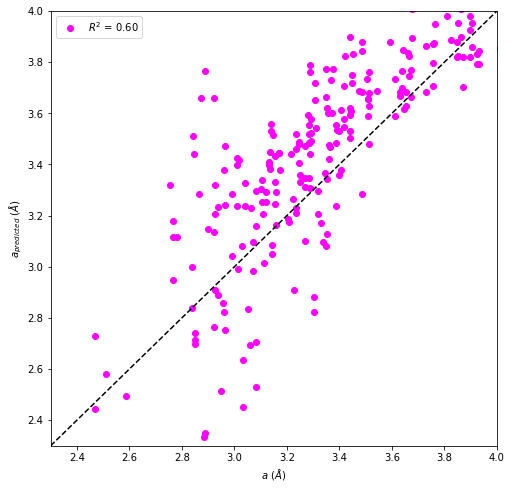

In [18]:
yhat_lr = cross_val_predict(lr, X, y, cv = kfold)

f, ax = plt.subplots(figsize=(8, 8))
label_mlr = "$R^2$ = %.2f" % r2_mean
plt.plot(y, yhat_lr, 'o', label=label_mlr, color = "magenta")
plt.ylabel(r"$a_{predicted}$ ($\AA$)")
plt.xlabel(r"$a$ ($\AA$)")
plt.legend()
plt.xlim([2.3, 4])
plt.ylim([2.3, 4])
plt.plot([2.3, 4], [2.3, 4], 'k--')
plt.show()

### Comment on the linear model
- **The model only shows about 59.87% accuracy score.** 
- We tried other models, including the boosting models.
- Cross-validation to reduce potential overfitting/underfitting is applied in all cases

### Explore and search for the best model

In [19]:
#Lets use train/split ratio of 70/30 - Use ShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
#kfold = KFold(n_splits = 5, shuffle = True, random_state = 42 )

# Use some linear reg model and some with boosting capabilities

hyper_params_lgbm = {
    "objective" : "multiclass",
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'n_estimators': 500,
    "verbosity" : -1 
}

hyper_params_xgb = { 
    'objective': 'reg:squarederror',  # error evaluation for multiclass tasks
    'n_estimators': 500,
    'eval_metric': mean_absolute_error
    }
#Use ShuffleSplit for cross validation of dataset. Kfold also gives similar result
cv_split = ShuffleSplit(n_splits = 5, test_size = 0.30, random_state = 42)

# Initializing the Algorithms # I have tried a couple of them. Just showing a handful here
algorithm_list = {'LinearReg': linear_model.LinearRegression(), 
                  'BayeRidge':linear_model.BayesianRidge(),
                  'LassoLars': linear_model.LassoLars(alpha=0.01),
                  'LeastAngLars':linear_model.Lars(),
                  'XgbostReg': xgb.XGBRegressor(**hyper_params_xgb),
                  'LGBMReg': lgbm.LGBMRegressor(**hyper_params_lgbm)
                 }
# Fit the various model
for key,model in algorithm_list.items():
    try:
        if key == 'XgbostReg' or key == 'LGBMReg':
            model.fit(X_train, y_train,early_stopping_rounds=100,eval_set=[(X_test, y_test)])
        else:
            model.fit(X_train, y_train)
        # Cross-validate the result to avoid over fitting
        cv_results = cross_validate(model, X_train, y_train, cv  = cv_split)
#        cv_results = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
        adj_R2 = 1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
        y_pred = model.predict(X_test) 
        # Print model and test metrics
        print(f'Model - {key: <5} || Model Score: %.3f, Adj_R^2: %.3f, Test Score: %.3f, Cross Val Score: %.3f' 
              %(model.score(X_train, y_train),adj_R2, model.score(X_test, y_test), cv_results.get('test_score').mean()))
        
        print(f'Model - {key: <5} || MSE: %.3f, MAE: %.3f, STD: %.3f, MAPE: %.3f%%' 
              %(metrics.mean_squared_error(y_test, y_pred), metrics.mean_absolute_error(y_test, y_pred), 
                cv_results.get('test_score').std(), metrics.mean_absolute_percentage_error(y_test, y_pred)*100))
        print(f'Model - {key: <5}  || Cross Validation Progress: \n')
        print(pd.DataFrame(cv_results))
        print('----------------------------------------------------------------------------------------------------------')
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass 

Model - LinearReg || Model Score: 0.633, Adj_R^2: 0.623, Test Score: 0.590, Cross Val Score: 0.565
Model - LinearReg || MSE: 0.154, MAE: 0.282, STD: 0.107, MAPE: 7.861%
Model - LinearReg  || Cross Validation Progress: 

   fit_time  score_time  test_score
0  0.002621    0.001659    0.636965
1  0.002652    0.001910    0.635825
2  0.002669    0.002394    0.357500
3  0.003101    0.001949    0.626100
4  0.002482    0.001899    0.566636
----------------------------------------------------------------------------------------------------------
Model - BayeRidge || Model Score: 0.614, Adj_R^2: 0.604, Test Score: 0.555, Cross Val Score: 0.546
Model - BayeRidge || MSE: 0.167, MAE: 0.297, STD: 0.084, MAPE: 8.273%
Model - BayeRidge  || Cross Validation Progress: 

   fit_time  score_time  test_score
0  0.004700    0.002528    0.617307
1  0.004476    0.001969    0.608430
2  0.004350    0.002351    0.389930
3  0.003833    0.002171    0.585274
4  0.003566    0.002644    0.531301
---------------------

/Users/sriharik/miniconda3/envs/nano281/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Model - LGBMReg || Model Score: 0.987, Adj_R^2: 0.987, Test Score: 0.852, Cross Val Score: 0.745
Model - LGBMReg || MSE: 0.056, MAE: 0.153, STD: 0.162, MAPE: 4.385%
Model - LGBMReg  || Cross Validation Progress: 

   fit_time  score_time  test_score
0  0.035303    0.002541    0.902749
1  0.074685    0.002329    0.831605
2  0.035389    0.002326    0.434750
3  0.033463    0.002104    0.800899
4  0.033262    0.002016    0.754851
----------------------------------------------------------------------------------------------------------


### Comment on the ML models performance 
***The boosting models performed the best. We will adopt the Xgboost model***

<a id='hyperparameter'></a>

## Part IV: Hyperparameter Optimization of best model

In [20]:
if (hyperparam_opt==True):
    # Doing hyperparameter optimization

    from sklearn.model_selection import StratifiedShuffleSplit
    from sklearn import model_selection

    n_estimators = [int(x) for x in np.linspace(start =50, stop = 500, num = 5)]
    max_depth = [int(x) for x in np.linspace(start =5, stop = 20, num = 5)]
    #bootstrap = [True, False]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    kfold = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 42) 
    #KFold(n_splits = 10, shuffle = True, random_state = rng )

    param_grid = {
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'objective':['reg:squarederror'],
        'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.10],
        'colsample_bytree': [0.5, 0.6, 0.7, 0.8]
    }

    bestmodel = XGBRegressor()

    xgb_bestmodel = model_selection.GridSearchCV( 
        estimator=bestmodel,
        param_grid=param_grid,
        scoring="r2",
        n_jobs = 4,
        cv=kfold,
        verbose = True

    )

    xgb_bestmodel.fit(X_train, y_train)


    #bestparams = model.best_estimator_.get_params()
    bestparams = xgb_bestmodel.best_params_
    bestscore = xgb_bestmodel.best_score_

    print("Best paramters for the chosen model: %s " % bestparams)
    print("Best r2 score: %.6f " % bestscore)


In [21]:
'''
This is the hyperparameter optimized information. Let's put it here since it takes time to run

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best paramters for the chosen model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 275, 'objective': 'reg:squarederror'} 
Best r2 score: 0.820106 
'''

"\nThis is the hyperparameter optimized information. Let's put it here since it takes time to run\n\nFitting 5 folds for each of 500 candidates, totalling 2500 fits\nBest paramters for the chosen model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 275, 'objective': 'reg:squarederror'} \nBest r2 score: 0.820106 \n"

<a id='bestmodelp'></a>

## Part V: Employing XGBoost Regression - Best model 

In [22]:
# Use boosting model, which was the best of all the models tested
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

param_best = {'colsample_bytree': 0.8, 
              'learning_rate': 0.1, 
              'max_depth': 5, 
              'n_estimators': 500, 
              'objective': 'reg:squarederror'}

xgbr = XGBRegressor(**param_best)
xgbr.fit(X_train, y_train,early_stopping_rounds=100,eval_set=[(X_test, y_test)])
cv_results = cross_validate(xgbr, X_train, y_train, cv  = cv_split)

adj_R2_train = 1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_R2_test = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
y_pred = xgbr.predict(X_test) 
R2_value = xgbr.score(X_test, y_test)
MSE = metrics.mean_squared_error(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)
        
print(f'Model Score: %.3f, Adj_R^2: %.3f, Test Score: %.3f, Cross Val Score: %.3f' 
      %(xgbr.score(X_train, y_train),adj_R2_train, xgbr.score(X_test, y_test), cv_results.get('test_score').mean()))
        
print(f'MSE: %.3f, MAE: %.3f, STD: %.3f, MAPE: %.3f%%' 
      %(MSE, MAE,cv_results.get('test_score').std(), MAPE*100))
        
print(f'Cross Validation Progress: \n')
print(pd.DataFrame(cv_results))


[0]	validation_0-rmse:2.76546
[1]	validation_0-rmse:2.49745
[2]	validation_0-rmse:2.26095
[3]	validation_0-rmse:2.04831
[4]	validation_0-rmse:1.85971
[5]	validation_0-rmse:1.68540
[6]	validation_0-rmse:1.53032
[7]	validation_0-rmse:1.39296
[8]	validation_0-rmse:1.26841
[9]	validation_0-rmse:1.15575
[10]	validation_0-rmse:1.05364
[11]	validation_0-rmse:0.96498
[12]	validation_0-rmse:0.88689
[13]	validation_0-rmse:0.81375
[14]	validation_0-rmse:0.74726
[15]	validation_0-rmse:0.69219
[16]	validation_0-rmse:0.64358
[17]	validation_0-rmse:0.59674
[18]	validation_0-rmse:0.55525
[19]	validation_0-rmse:0.51580
[20]	validation_0-rmse:0.48230
[21]	validation_0-rmse:0.45392
[22]	validation_0-rmse:0.42633
[23]	validation_0-rmse:0.40130
[24]	validation_0-rmse:0.37911
[25]	validation_0-rmse:0.36129
[26]	validation_0-rmse:0.34377
[27]	validation_0-rmse:0.33020
[28]	validation_0-rmse:0.31740
[29]	validation_0-rmse:0.30699
[30]	validation_0-rmse:0.29640
[31]	validation_0-rmse:0.28894
[32]	validation_0-

[260]	validation_0-rmse:0.20480
[261]	validation_0-rmse:0.20480
[262]	validation_0-rmse:0.20476
[263]	validation_0-rmse:0.20473
[264]	validation_0-rmse:0.20476
[265]	validation_0-rmse:0.20477
[266]	validation_0-rmse:0.20477
[267]	validation_0-rmse:0.20476
[268]	validation_0-rmse:0.20475
[269]	validation_0-rmse:0.20474
[270]	validation_0-rmse:0.20473
[271]	validation_0-rmse:0.20475
[272]	validation_0-rmse:0.20474
[273]	validation_0-rmse:0.20474
[274]	validation_0-rmse:0.20473
[275]	validation_0-rmse:0.20471
[276]	validation_0-rmse:0.20467
[277]	validation_0-rmse:0.20468
[278]	validation_0-rmse:0.20465
[279]	validation_0-rmse:0.20465
[280]	validation_0-rmse:0.20469
[281]	validation_0-rmse:0.20469
[282]	validation_0-rmse:0.20468
[283]	validation_0-rmse:0.20467
[284]	validation_0-rmse:0.20467
[285]	validation_0-rmse:0.20467
[286]	validation_0-rmse:0.20465
[287]	validation_0-rmse:0.20465
[288]	validation_0-rmse:0.20462
[289]	validation_0-rmse:0.20460
[290]	validation_0-rmse:0.20460
[291]	va

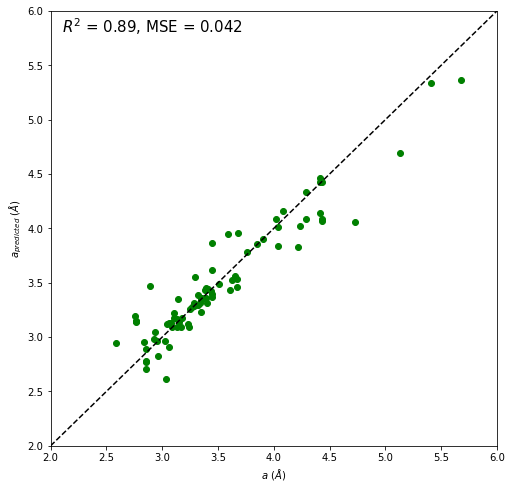

In [23]:
f, ax = plt.subplots(figsize=(8, 8))
#label_xgbr = f'$R^2$ = %.3f, Adj_$R^2$ = %.3f, \n MSE =  %.3f, MAE = %.3f' %(R2_value,adj_R2_test, MSE, MAE)    
plt.plot(y_test, y_pred, 'o', color = "green")
plt.ylabel(r"$a_{predicted}$ ($\AA$)")
plt.xlabel(r"$a$ ($\AA$)")
#plt.legend()
plt.xlim([2, 6])
plt.ylim([2, 6])
plt.plot([2, 6], [2, 6], 'k--')
plt.annotate(r"$R^2$ = %.2f, MSE = %.3f" % (R2_value, MSE), (2.1, 5.8), fontsize=15);
#plt.show()

if savefigs==True:
    f.savefig("Figures/BestModel_2D", dpi = 1200, transparent = False, facecolor = 'white')

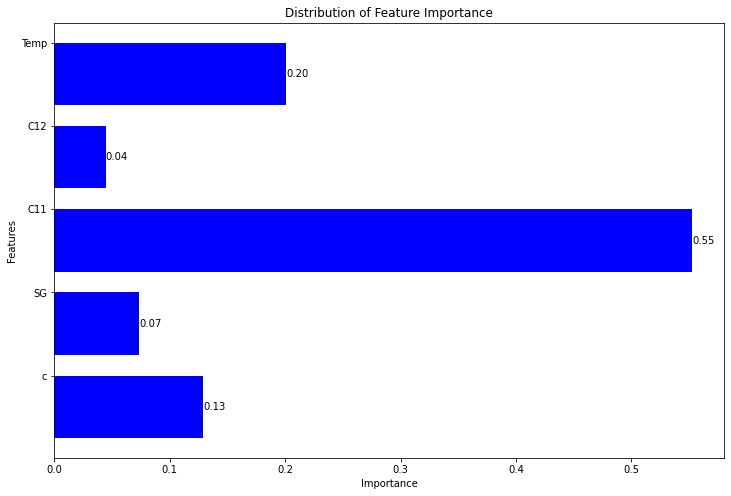

In [24]:
x = X_train.columns
y = xgbr.feature_importances_

fig, ax = plt.subplots(figsize=(12,8))    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Distribution of Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# Print the values on the barchart
ax.bar_label(ax.containers[0],label_type='edge',fmt='%.2f')

plt.show()

if savefigs==True:
    fig.savefig("Figures/FeatImp_2D", dpi = 1200, transparent = False, facecolor = 'white')

In [25]:
# Check the evolution of features
thresholds = sort(y)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgbr, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBRegressor()
    selection_model.fit(select_X_train, y_train)
    # evaluate model1
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = metrics.r2_score(y_test, y_pred)   
    print("Thresh=%.3f, n=%d, Accuracy: %.3f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.044, n=5, Accuracy: 88.546%
Thresh=0.073, n=4, Accuracy: 89.097%
Thresh=0.129, n=3, Accuracy: 86.444%
Thresh=0.201, n=2, Accuracy: 69.096%
Thresh=0.553, n=1, Accuracy: 34.990%


<a id='makeprediction1'></a>

## Part VI: Predictions with designed ML model - Out of sample 1

- We removed 20% of the whole dataset as unseen sample to further demonstrate out-of-sample accuracy of the developed model

In [26]:
x_final = [c for c in predict_data_1.columns if c!= "a"]
X_predict_data_1 = data_test[x_final]
y_predict_data_1 = data_test["a"]
X_predict_data_1.head(5)

,c,SG,C11,C12,Temp
Material,,,,,
Al-N-2,27.051,3,117.54,49.73,1
Zr-Se-2,11.529,3,73.87,26.81,0
B-N-2,39.364,3,233.63,32.27,1
Zn-S-2,18.794,3,61.26,32.77,0
Zn-Se,16.882,3,22.50,-0.90,2


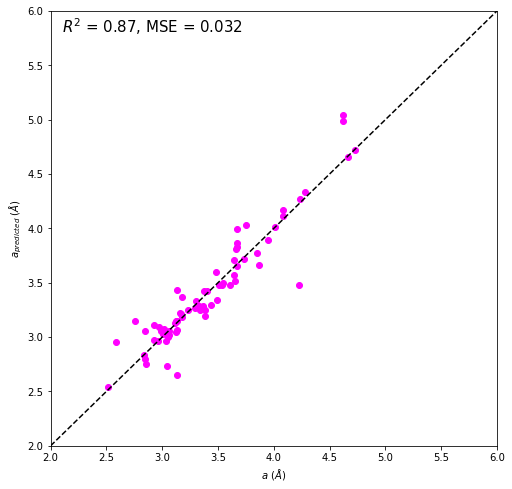

In [27]:
#xgbr.fit(x,y)
prediction_1 = xgbr.predict(X_predict_data_1)

r2_score = xgbr.score(X_predict_data_1, y_predict_data_1)
mse = mean_squared_error(y_predict_data_1, prediction_1)

f, ax = plt.subplots(figsize=(8, 8))
#sns.scatterplot(x=y_predict_data_1, y=prediction_1)
plt.plot(y_predict_data_1, prediction_1, 'o', color = "magenta")
#r2_score =  r2_score(y_predict_data_1, prediction_1)
plt.ylabel(r"$a_{predicted}$ ($\AA$)")
plt.xlabel(r"$a$ ($\AA$)")
plt.xlim([2, 6])
plt.ylim([2, 6])
plt.plot([2, 6], [2, 6], 'k--')
plt.annotate(r"$R^2$ = %.2f, MSE = %.3f" % (r2_score, mse), (2.1, 5.8), fontsize=15);

if savefigs==True:
    f.savefig("Figures/Prediction1_2D", dpi = 1200, transparent = False, facecolor = 'white')

In [28]:
result = X_predict_data_1.copy()
result['a'] = y_predict_data_1
result['a_predicted'] = prediction_1
result.drop(['SG', 'Temp'], axis = 1, inplace = True)
#result.drop(['SG-156', 'SG-8', '0K', '1T', 'Phase', 'Temp'], axis = 1, inplace = True)
result['% error of a'] = (abs(prediction_1 - y_predict_data_1 ))*100/y_predict_data_1
display(result)

,c,C11,C12,a,a_predicted,% error of a
Material,,,,,,
Al-N-2,27.051,117.54,49.73,3.120667,3.045189,2.418642
Zr-Se-2,11.529,73.87,26.81,3.664000,3.807817,3.925149
B-N-2,39.364,233.63,32.27,2.587000,2.952832,14.141148
Zn-S-2,18.794,61.26,32.77,3.871000,3.665635,5.305228
Zn-Se,16.882,22.50,-0.90,4.084000,4.168666,2.073112
...,...,...,...,...,...,...
Cr-Se-2,15.320,105.68,28.11,3.178000,3.371546,6.090176
Ni-Ge-Se,38.054,187.37,65.79,3.113000,3.127603,0.469107
V-Ge-Se,37.630,128.27,90.72,3.130500,3.066542,2.043048


 <a id='makeprediction2'></a>

## Part VI: Predictions with designed ML model - Out of sample 2

- To further demonstrate the accuracy of the developed model, we have extracted data from current literature.  

In [29]:
predict_data_2 = pd.read_csv('2D-data/OutOfSample2.csv')
predict_data_2 = pd.DataFrame(predict_data_2)

### References of the data used for the out-of-sample validation in OutOfSample2.csv
1. M. Faghihnasiri, A. Ahmadi, S. A. Golpayegan, S. G. Sharifabadi, and A. Ramazani, A First-Principles Study of Nonlinear Elastic Behavior and Anisotropic Electronic Properties of Two-Dimensional HfS2, ***Nanomaterials***, **10**(3), 446 (2020). [Faghihnasiri et al](https://doi.org/10.3390/nano10030446 'Please click for the url') 

2. C. E. Ekuma and S. Najmaei, Graphene/ZnO van der Waals Stacks for Thermal Management, ***ACS Appl. Nano Mater.***, **3**(7), 7136-7142 (2020). [Ekuma&Sina](https://pubs.acs.org/doi/abs/10.1021/acsanm.0c01465 'Please click for the url')

3. Q. Peng, C. Liang, W. Ji, and S. De, A First Principles Investigation of the Mechanical Properties of g-TlN, ***Modeling and Numerical Simulation of Material Science***, **2**(4), 76-84 (2012). [Peng et al](10.4236/mnsms.2012.24009 'Please click for the url')

4. Wei, Xiaoding et al. Nonlinear elastic behavior of graphene: Ab initio calculations to continuum description, ***Phys. Rev. B 80***  205407 (2009). [Wei, Xiaoding et al](https://link.aps.org/doi/10.1103/PhysRevB.80.205407 'Please click for the url')

5. Peng, Qing, en Suvranu De. Outstanding mechanical properties of monolayer MoS2 and its application in elastic energy storage. ***Phys. Chem. Chem. Phys. 15*** 19427–19437 (2013). [Peng&De](http://dx.doi.org/10.1039/C3CP52879K 'Please click for the url')

6. Zeng Fan, Zhang Wei-Bing†, Tang Bi-Yu‡. Electronic structures and elastic properties of monolayer and bilayer transition metal dichalcogenides MX2 ( M = Mo, W; X = O, S, Se, Te): A comparative first-principles study . ***Chinese Physics B, 24***(9), 097103. [Fan et al](http://cpb.iphy.ac.cn/article/2015/cpb_24_9_097103.html 'Please click for the url') 

7. Peng, Qing, Wei Ji, en Suvranu De. Mechanical properties of the hexagonal boron nitride monolayer: Ab initio study. ***Computational Materials Science 56*** 11–17 (2012). [Peng et all](https://www.sciencedirect.com/science/article/pii/S0927025611006902 'Please click for the url')

In [30]:
MatName = predict_data_2['Materials']
predict_data_2.drop(labels = 'Phase', axis = 'columns', inplace = True)
predict_data_2

,Materials,a,c,C11,C12,SG,Temp
0,MoO2,2.830,20.00,232.9200,84.670,187,0K
1,MoS2,3.180,15.00,134.8900,32.030,187,0K
2,MoSe2,3.320,20.00,110.7000,25.660,187,0K
3,MoTe2,3.550,20.00,84.7200,20.250,187,0K
4,WO2,2.850,20.00,253.2500,91.320,187,0K
5,WS2,3.180,20.00,148.4700,31.200,187,0K
6,WSe2,3.320,20.00,122.0100,22.910,187,0K
7,WTe2,3.550,20.00,91.4200,15.400,187,0K
8,HfS2,3.640,15.00,86.2900,15.280,187,0K
9,MoS2,3.160,12.31,151.5361,65.243,187,0K


### Label Encode the categorical data

In [31]:
## Before we encode the data we change the rarely occuring SG (191) to 0. 
replace_rare_SG_occurances(predict_data_2)

##Encoding starts here
categorical_variables = ['SG','Temp']
for c, encoder in zip(categorical_variables, enc):
    print(f"Label Encoding: {c} - {predict_data_2[c].nunique()}")
    predict_data_2[c] = encoder.transform(predict_data_2[c])
    
col_name = ['a','c', 'SG', 'C11', 'C12', 'Temp'] #, '1T', '2H']
predict_data_2 = predict_data_2.reindex(columns = col_name)

Label Encoding: SG - 2
Label Encoding: Temp - 1


In [32]:
f = [c for c in predict_data_2.columns if c not in ['a']]
X = predict_data_2[f]
y = predict_data_2['a']

In [33]:
prediction_2 = xgbr.predict(X)
df = pd.DataFrame({'Real Values':y, 'Predicted Values':prediction_2})
df
print('Out-of-sample Accuracy Score is:',xgbr.score(X, y), 'with MSE of',mean_squared_error(prediction_2, y))

Out-of-sample Accuracy Score is: 0.8793580874122475 with MSE of 0.017451244126514328


In [34]:
# Print the dataset with the predicted column
predict_data_2['a_predicted'] = prediction_2
predict_data_2['Materials'] = MatName
predict_data_2['% error of a'] = (abs(predict_data_2['a'] - predict_data_2['a_predicted'] ))*100/predict_data_2['a']
predict_data_2

,a,c,SG,C11,C12,Temp,a_predicted,Materials,% error of a
0,2.830,20.00,3,232.9200,84.670,0,2.875337,MoO2,1.602019
1,3.180,15.00,3,134.8900,32.030,0,3.222571,MoS2,1.338715
2,3.320,20.00,3,110.7000,25.660,0,3.311300,MoSe2,0.262054
3,3.550,20.00,3,84.7200,20.250,0,3.413499,MoTe2,3.845102
4,2.850,20.00,3,253.2500,91.320,0,2.896869,WO2,1.644516
5,3.180,20.00,3,148.4700,31.200,0,3.234337,WS2,1.708714
6,3.320,20.00,3,122.0100,22.910,0,3.258720,WSe2,1.845771
7,3.550,20.00,3,91.4200,15.400,0,3.403389,WTe2,4.129901
8,3.640,15.00,3,86.2900,15.280,0,3.458532,HfS2,4.985375
9,3.160,12.31,3,151.5361,65.243,0,3.358949,MoS2,6.295845


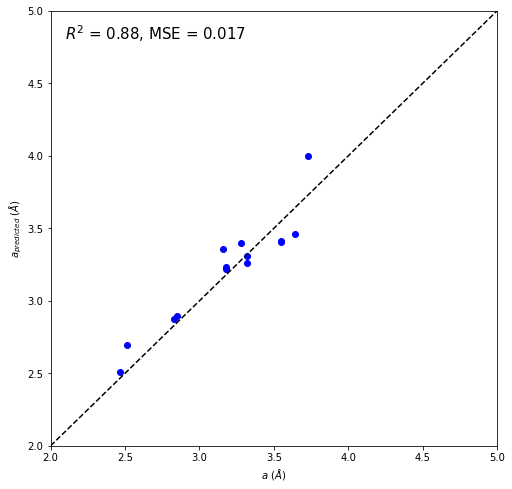

In [35]:
f, ax = plt.subplots(figsize=(8, 8))
#sns.scatterplot(x=y_predict_data_1, y=prediction_1)
plt.plot(y, prediction_2, 'o', color = "blue")
#r2_score =  r2_score(y_predict_data_1, prediction_1)
plt.ylabel(r"$a_{predicted}$ ($\AA$)")
plt.xlabel(r"$a$ ($\AA$)")
plt.xlim([2, 5])
plt.ylim([2, 5])
plt.plot([2, 5], [2, 5], 'k--')
plt.annotate(r"$R^2$ = %.2f, MSE = %.3f" % (xgbr.score(X, y), mean_squared_error(prediction_2, y)), (2.1, 4.8), fontsize=15);

if savefigs==True:
    f.savefig("Figures/Prediction2_2D", dpi = 1200, transparent = False, facecolor = 'white')

## End of Case Study